<a href="https://colab.research.google.com/github/ldcasano/Analisis-DATASET/blob/main/tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np



df = pd.read_csv(r"/content/bank-full.csv", sep=';', na_values='unknown')

df = pd.read_csv(r"/content/bank-full.csv", sep=';', na_values='unknown')

df = df.dropna(subset=['poutcome'])
df = df.dropna(subset=['contact'])
df = df.dropna(subset=['education'])

df['poutcome'] = df['poutcome'].map({'success': 1, 'failure': 0, 'other': 2})
df = df[df['poutcome'] != 2]

df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

df['contact'] = df['contact'].map({'cellular': 1, 'telephone': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})


df['default'] = df['default'].map({'yes': 1, 'no': 0})


print(df.shape)
print(df.info)
print(df.head)




(6113, 17)
<bound method DataFrame.info of        age         job   marital  education  default  balance  housing  loan  \
24060   33      admin.   married   tertiary        0      882        0     0   
24064   33    services   married  secondary        0     3444        1     0   
24077   36  management   married   tertiary        0        0        1     0   
24127   51      admin.    single  secondary        0     3132        0     0   
24151   33  unemployed  divorced  secondary        0     1005        1     0   
...    ...         ...       ...        ...      ...      ...      ...   ...   
45194   59  management   married   tertiary        0      138        1     1   
45195   68     retired   married  secondary        0     1146        0     0   
45201   53  management   married   tertiary        0      583        0     0   
45204   73     retired   married  secondary        0     2850        0     0   
45208   72     retired   married  secondary        0     5715        0     0 

In [4]:
columnas_a_normalizar = ['balance', 'pdays','age', 'day', 'duration', 'previous']

for columna in columnas_a_normalizar:
    max_val = df[columna].max()
    if max_val != 0:
        df[columna] = df[columna] / max_val

print(df.head())

            age         job   marital  education  default   balance  housing  \
24060  0.375000      admin.   married   tertiary        0  0.010862        0   
24064  0.375000    services   married  secondary        0  0.042412        1   
24077  0.409091  management   married   tertiary        0  0.000000        1   
24127  0.579545      admin.    single  secondary        0  0.038570        0   
24151  0.375000  unemployed  divorced  secondary        0  0.012376        1   

       loan  contact       day month  duration  campaign     pdays  previous  \
24060     0        0  0.677419   oct  0.017575         1  0.173364  0.054545   
24064     0        0  0.677419   oct  0.064894         1  0.104478  0.072727   
24077     0        0  0.741935   oct  0.063091         1  0.164179  0.054545   
24127     0        0  0.161290   nov  0.202343         1  0.202067  0.018182   
24151     0        0  0.322581   nov  0.078864         1  0.199770  0.036364   

       poutcome  y  
24060         0  

In [6]:
df['job'] = df['job'].astype('category').cat.codes
df['education'] = df['education'].astype('category').cat.codes
df['marital'] = df['marital'].astype('category').cat.codes
df['month'] = df['month'].astype('category').cat.codes

df_numeric = df.select_dtypes(include=['number'])

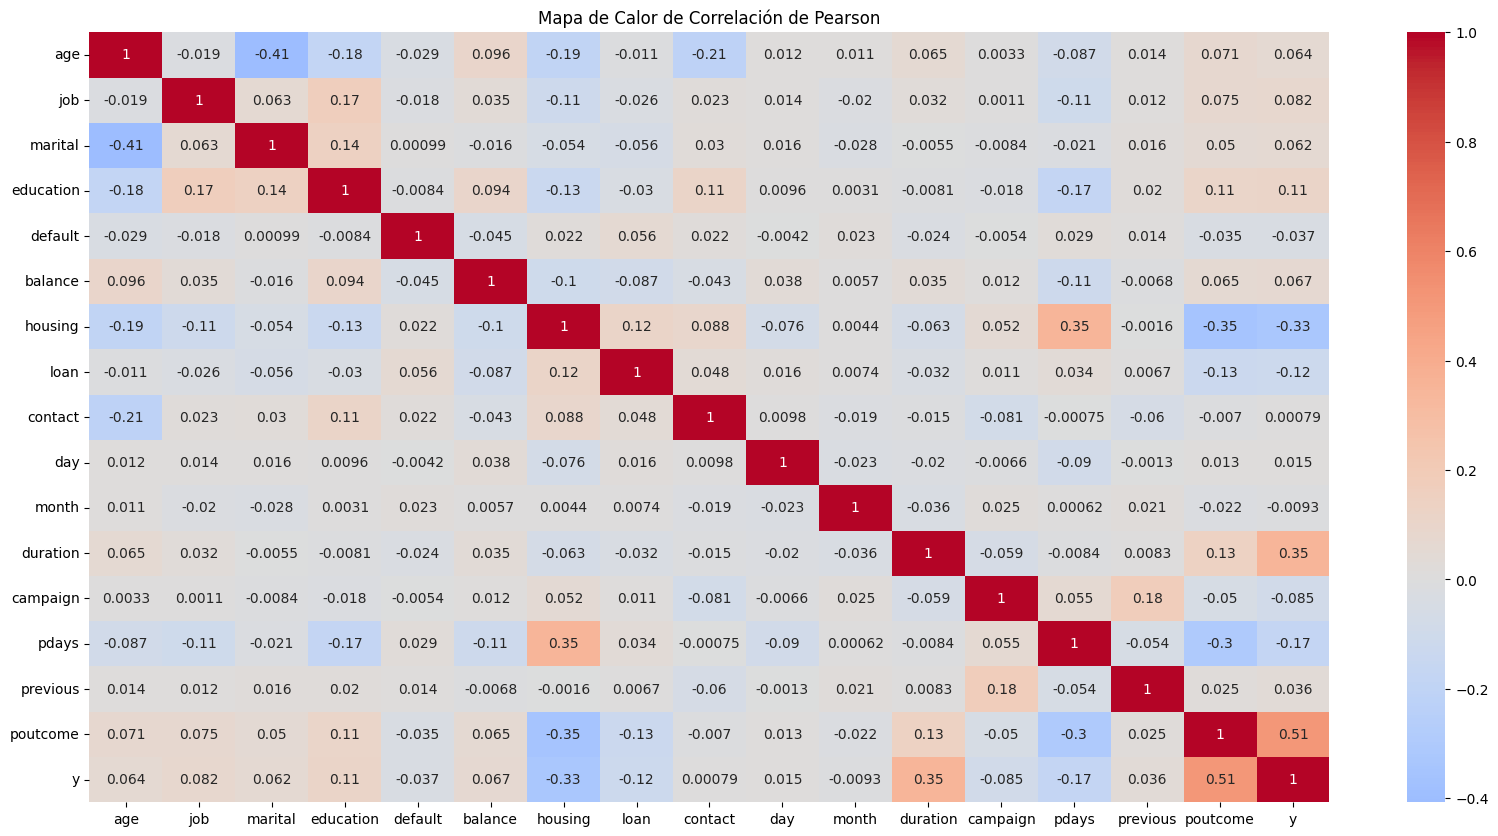

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

correlacion_pearson = df.corr(method='pearson')



plt.figure(figsize=(20, 10))
sns.heatmap(correlacion_pearson, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlación de Pearson')
plt.show()

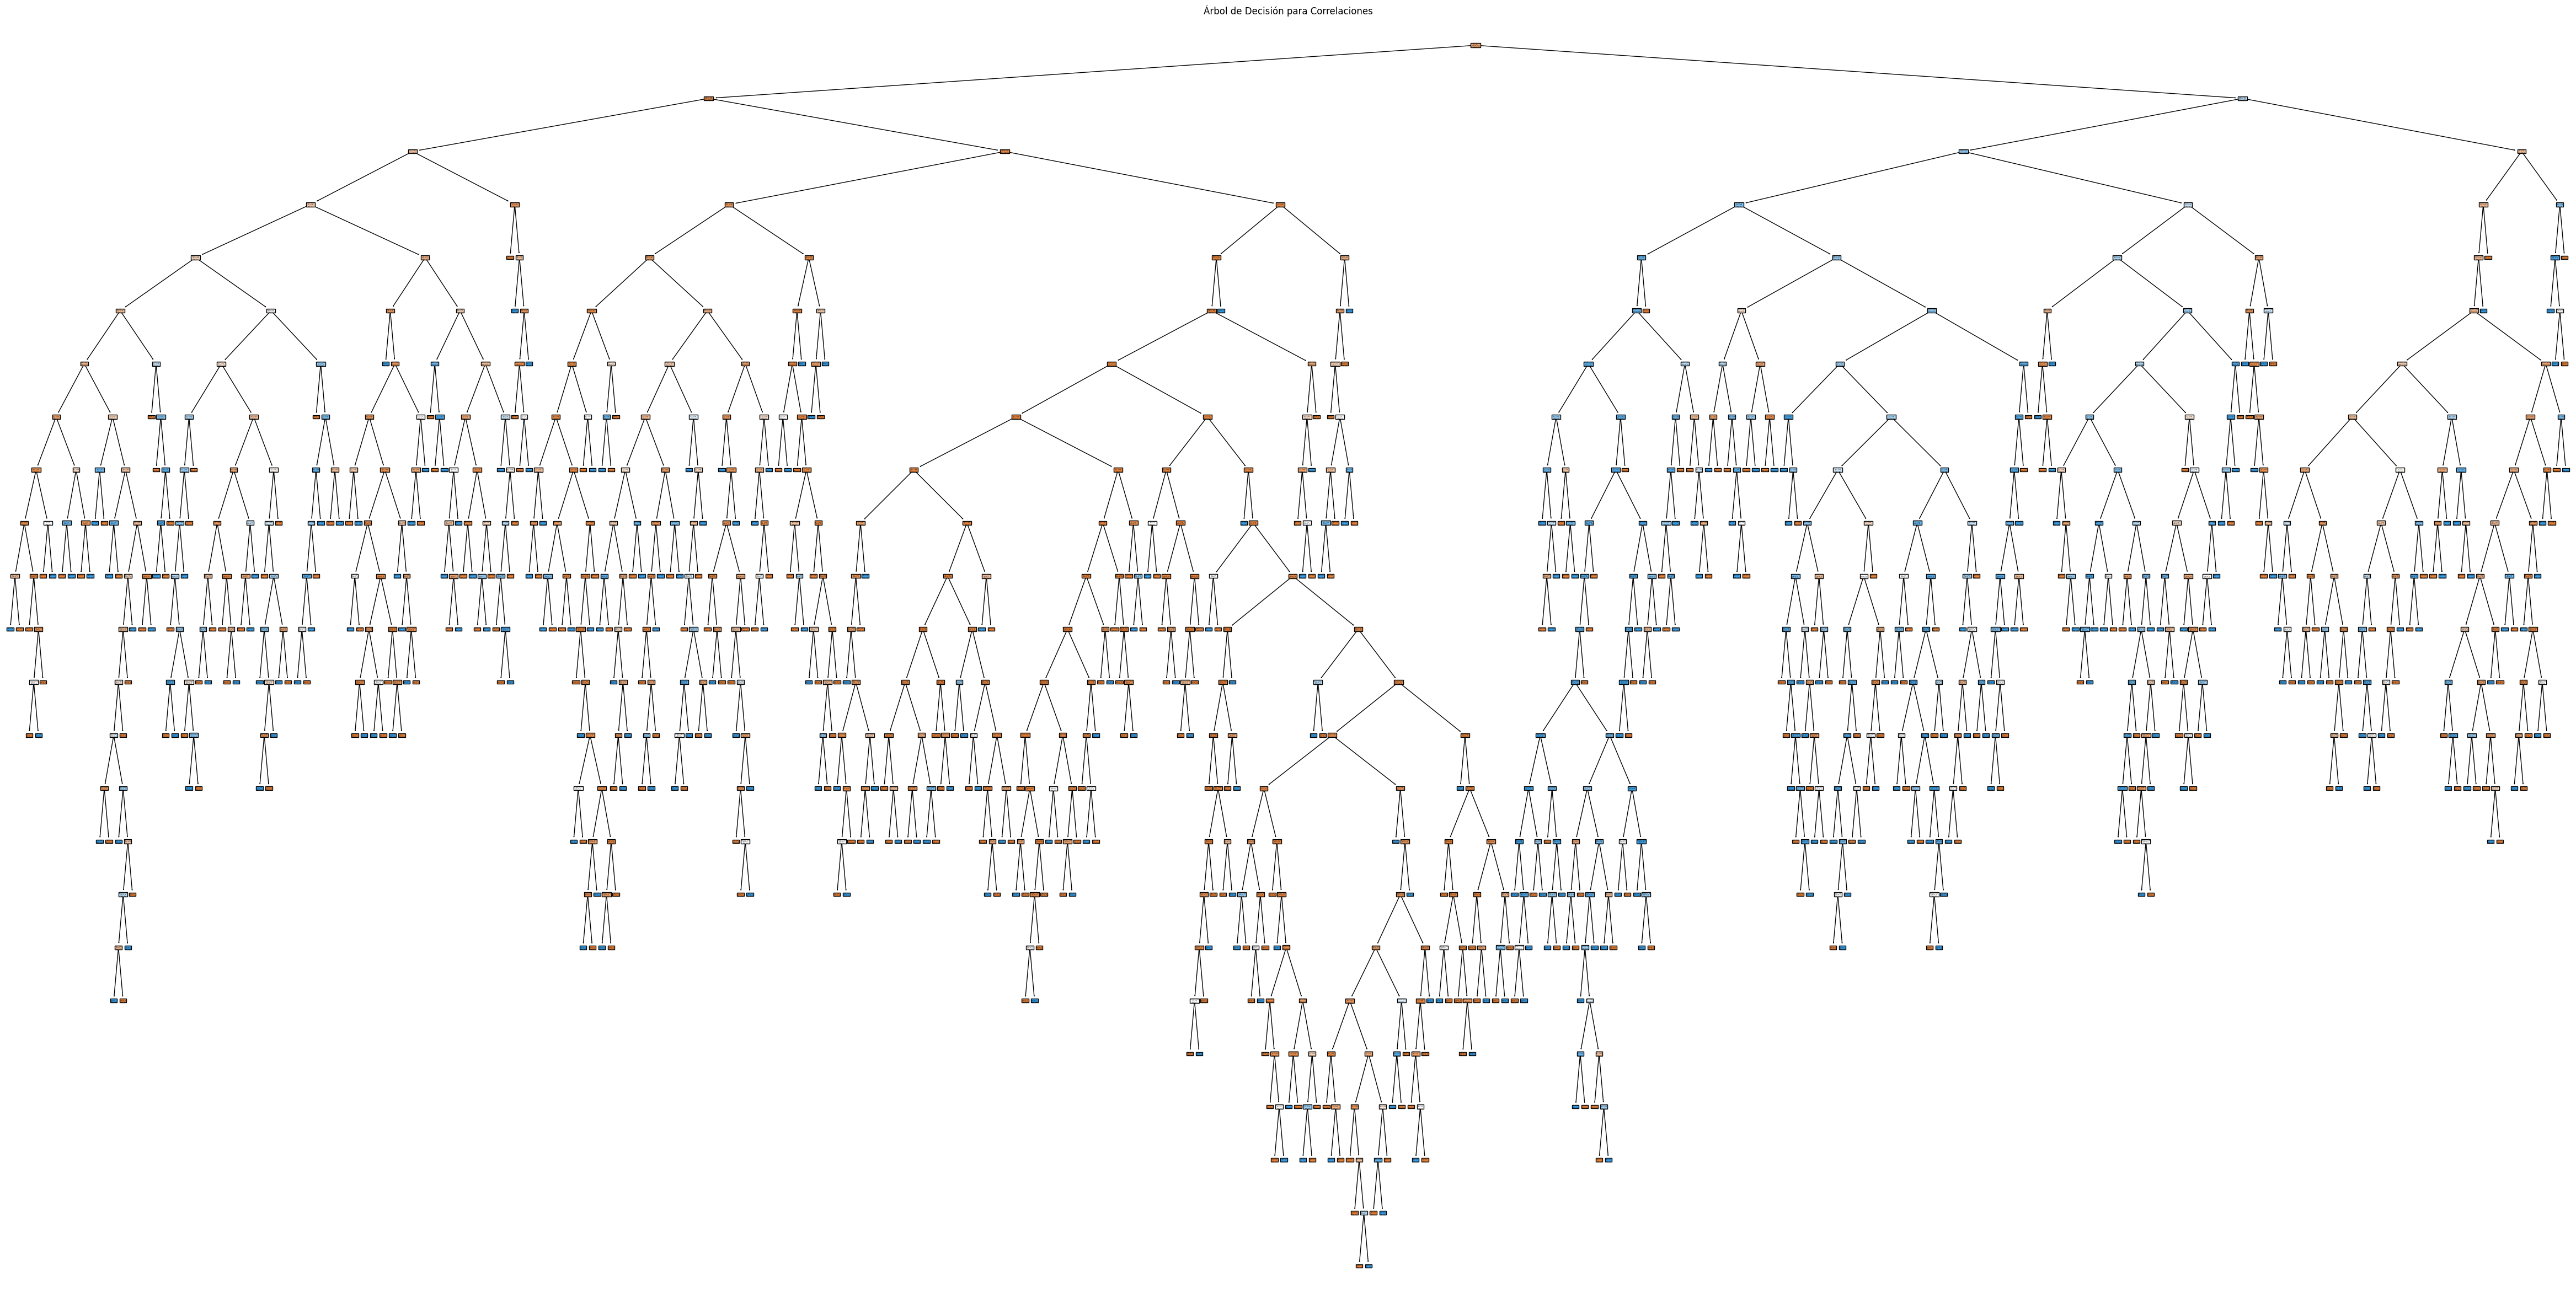

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

X = df.drop('poutcome', axis=1)
y = df['poutcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


plt.figure(figsize=(60, 30))
tree.plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Árbol de Decisión para Correlaciones')
plt.show()

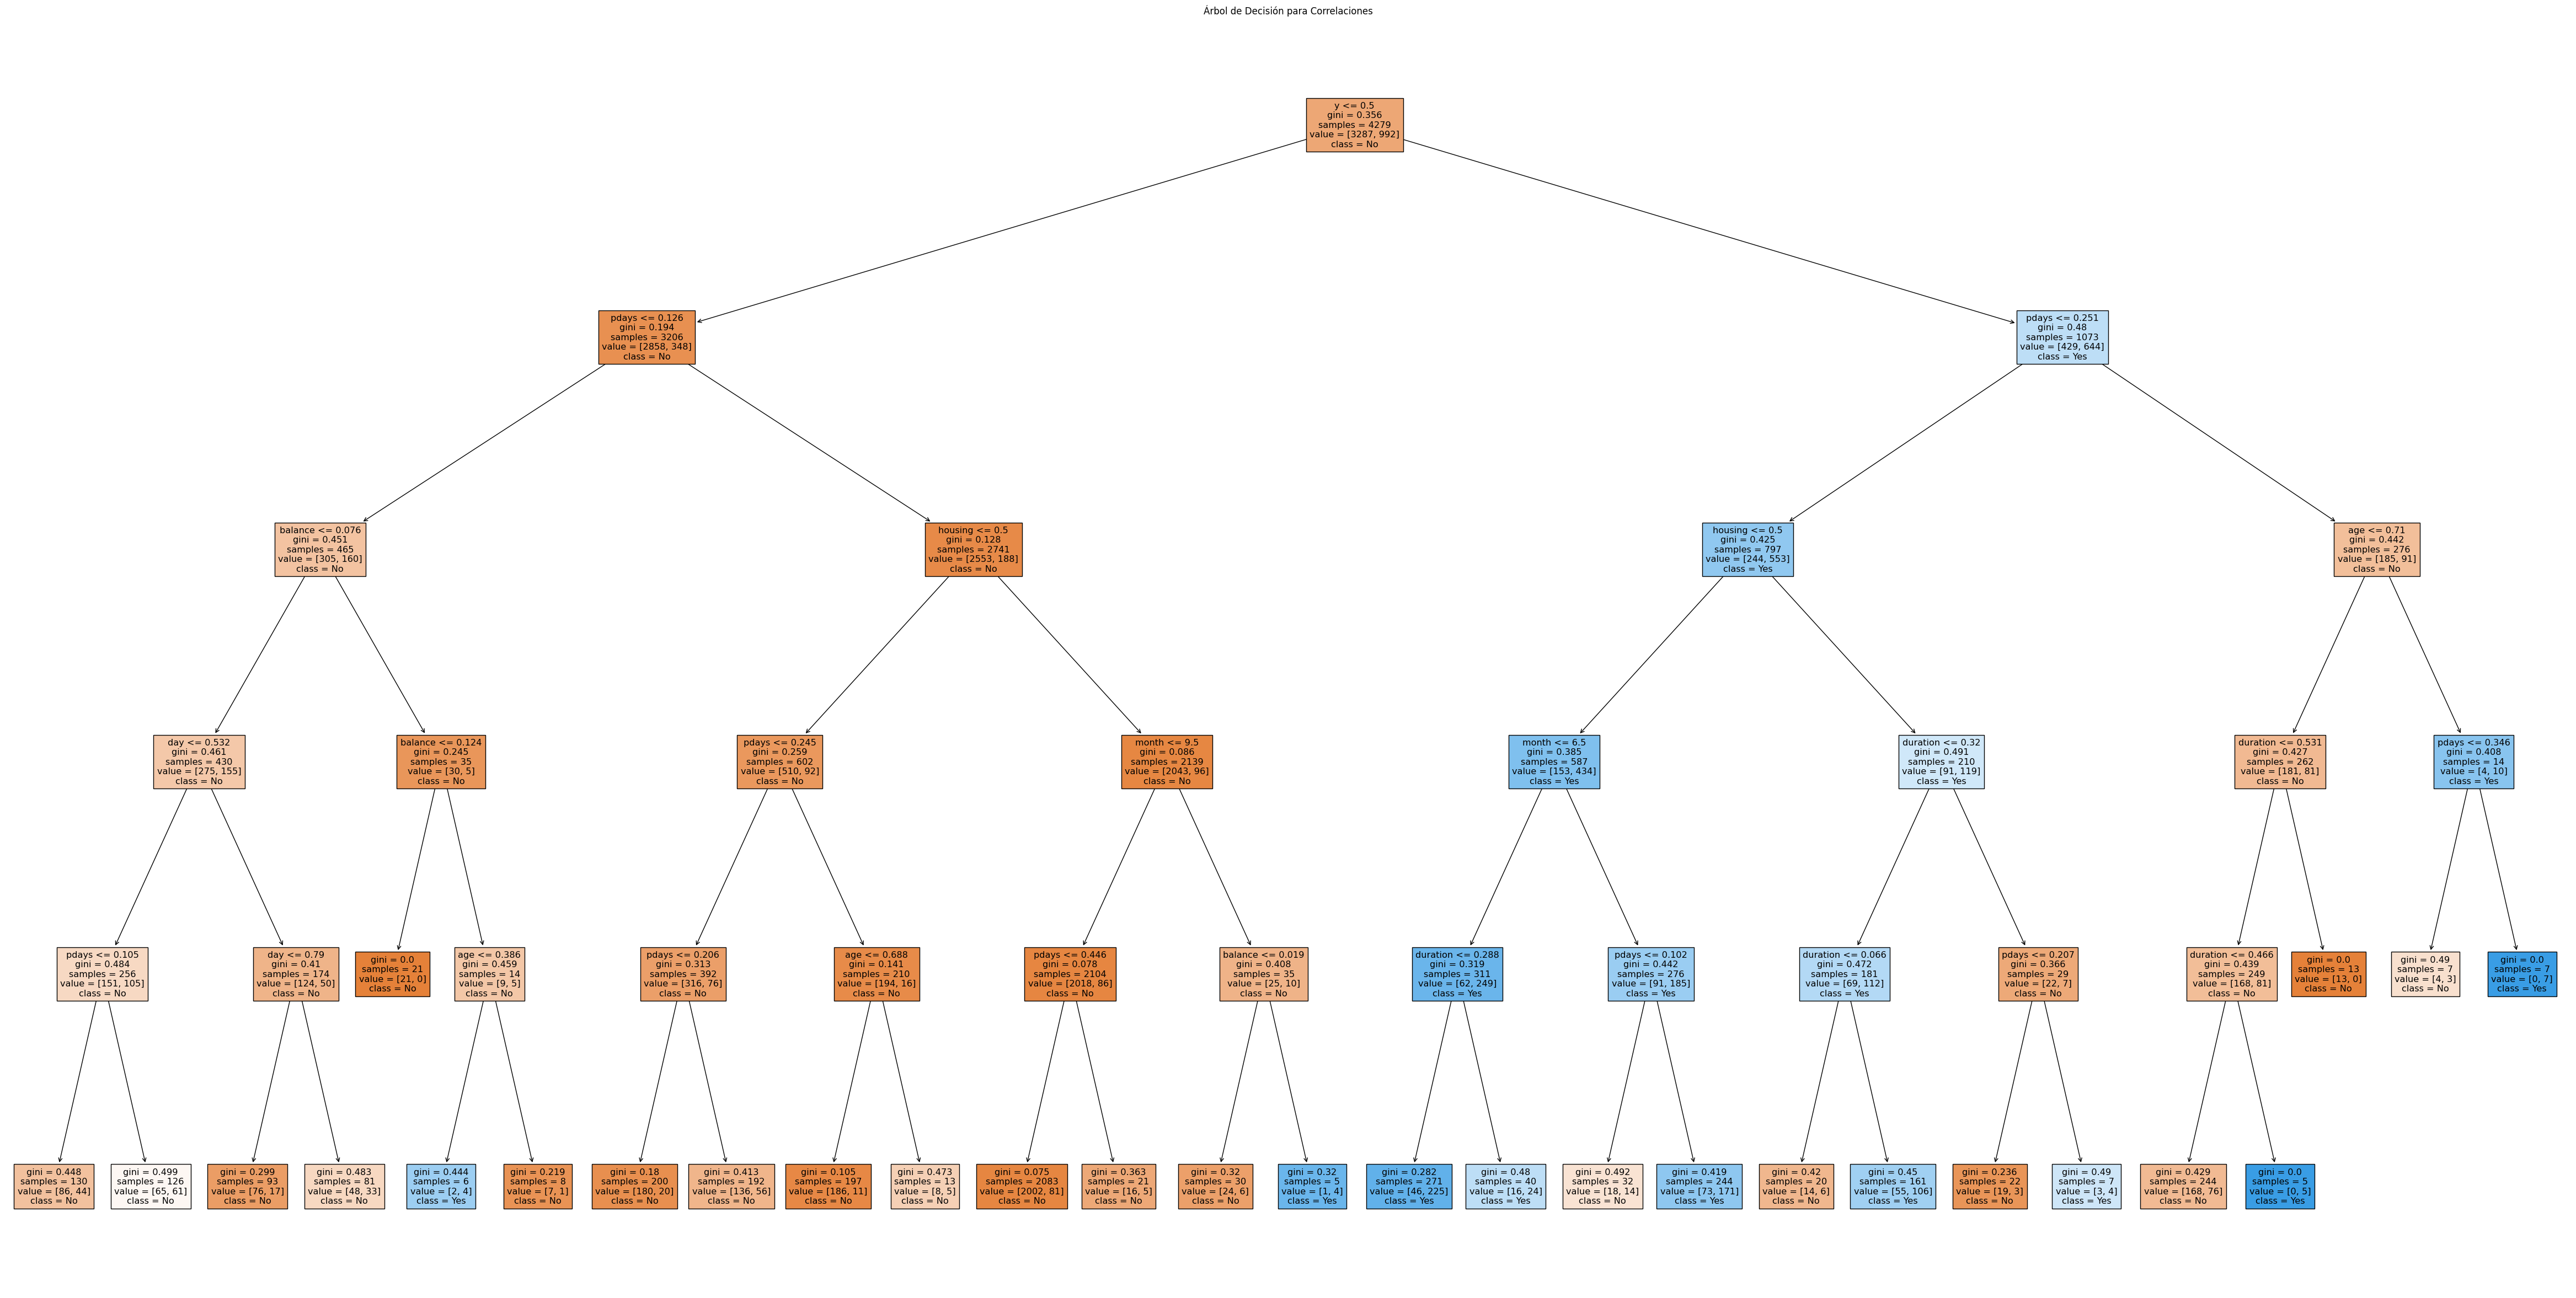

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo de árbol de decisión con profundidad limitada
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)


model = DecisionTreeClassifier(
    max_depth=5,  # Limitar la profundidad máxima
    min_samples_split=10,  # Mínimo número de muestras para dividir un nodo
    min_samples_leaf=5,  # Mínimo número de muestras en una hoja
    random_state=42
)
model.fit(X_train, y_train)

plt.figure(figsize=(60, 30))
tree.plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Árbol de Decisión para Correlaciones')
plt.show()

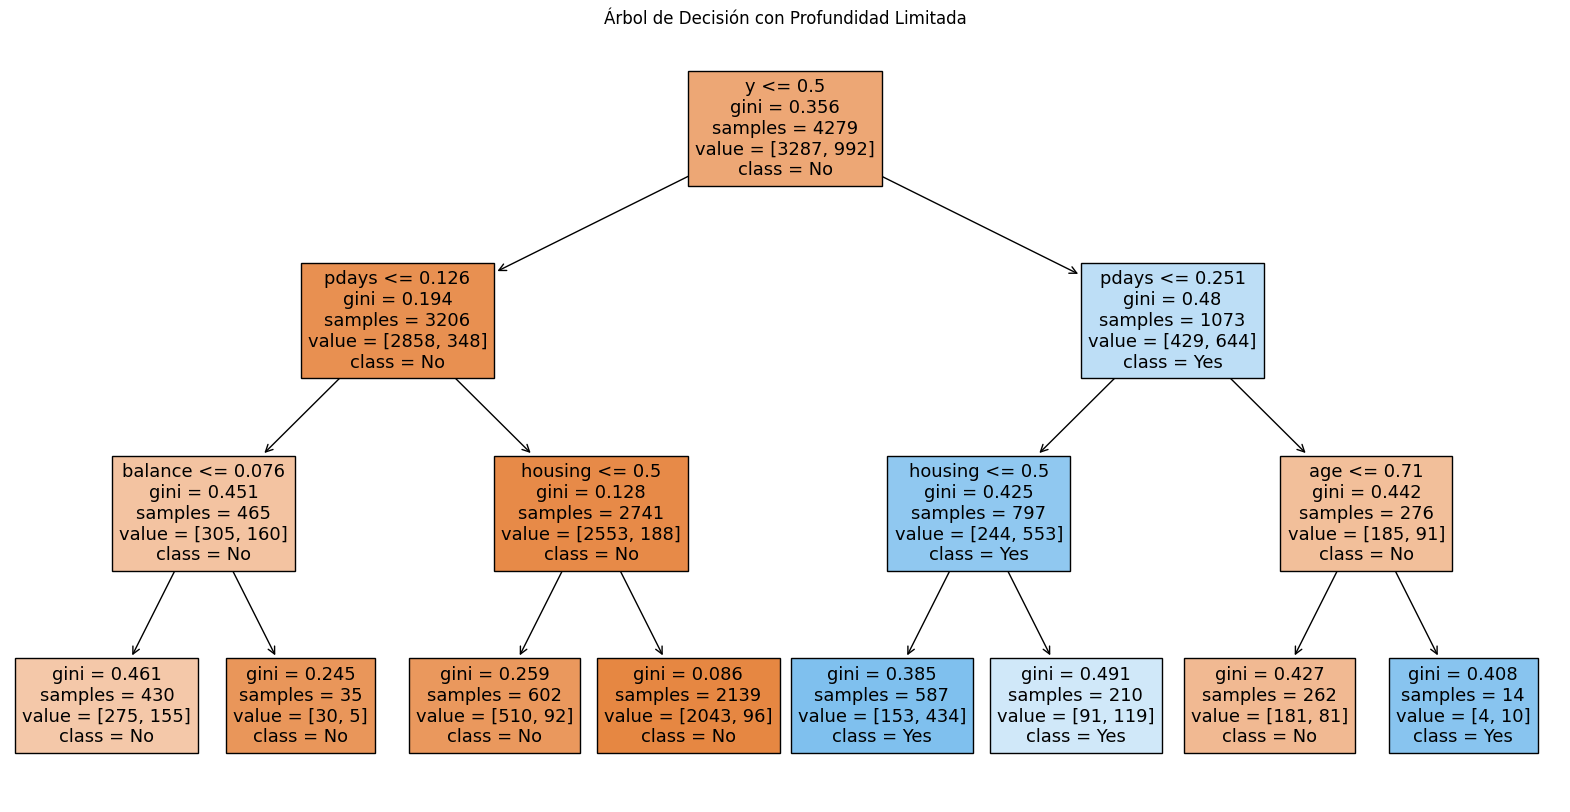

In [17]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Visualización del árbol
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Árbol de Decisión con Profundidad Limitada")
plt.show()